In [1]:
%matplotlib inline

import numpy as np  # linear algebra
import nibabel as nib
import ct_utils
import glob

# Some constants
DATA_PATH = '/media/gaetano/DATA/DATA_CT_HEADS/'
NIFTI_PATH = '/media/gaetano/DATA/DATA_NIFTI_JAWS/'

In [2]:
# Get paths to dicom files and nifti labels
data_sample_paths = glob.glob(DATA_PATH + '*')
data_sample_paths.sort()
list_data_paths = []

for sample in data_sample_paths:
    list_data_paths.append(ct_utils.get_sample_label_id(sample))

print(len(data_sample_paths))

56


In [3]:
ct_utils.convert_dicom_dataset_to_nifti(list_data_paths, NIFTI_PATH)

0: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-102436/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-102436/102436.label.nii', 'id': '102436'}
1: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-105584/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-105584/105584.labels.nii', 'id': '105584'}
2: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-109619/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-109619/109619.labels.nii', 'id': '109619'}
3: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-109634/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-109634/109634.labels.nii', 'id': '109634'}
4: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-109799/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-109799/109799.labels.nii', 'id': '109799'}
5: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-109833/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/D

/home/gaetano/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


42: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-179082/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-179082/179082.labels.nii', 'id': '179082'}
43: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-179458/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-179458/179458.labels.nii', 'id': '179458'}
44: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-180030/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-180030/180030.labels.nii', 'id': '180030'}
45: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-180398/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-180398/180398.labels.nii', 'id': '180398'}
46: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-182948/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-182948/182948.labels.nii', 'id': '182948'}
47: Converted: {'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-185030/THIN_ST_HEAD', 'label': '/media/gaetano

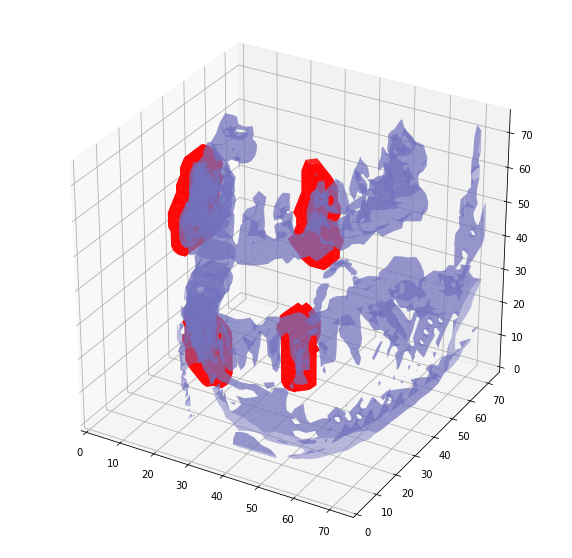

In [3]:
data_sample_paths = glob.glob(NIFTI_PATH + '*')
data_sample_paths.sort()
list_data_paths = []

index = 0
sample = ct_utils.get_sample_label_id(data_sample_paths[index], is_nifti_dataset=True)

# Plot from Nifti dataset
nifti_jaw = nib.load(sample['data'])
jaw = np.asarray(nifti_jaw.dataobj)

nifti_label = nib.load(sample['label'])
label = np.asarray(nifti_label.dataobj)

sum_labels = np.sum(label, axis=0)
ct_utils.plot_3d_with_labels(jaw, sum_labels, threshold=1400, transpose=[2, 1, 0], step_size=2)

In [4]:
data_sample_paths = glob.glob(DATA_PATH + '*')
data_sample_paths.sort()
list_data_paths = []
for sample in data_sample_paths:
    list_data_paths.append(ct_utils.get_sample_label_id(sample))
print(list_data_paths[0])

sample = 0
first_sample = ct_utils.load_scan(list_data_paths[sample]['data'])
first_sample_pixels = ct_utils.convert_to_hounsfield(first_sample)
nifti = nib.load(list_data_paths[sample]['label'])
label = np.asarray(nifti.dataobj)
label = label.transpose(2, 1, 0)

{'data': '/media/gaetano/DATA/DATA_CT_HEADS/case-102436/THIN_ST_HEAD', 'label': '/media/gaetano/DATA/DATA_CT_HEADS/case-102436/102436.label.nii', 'id': '102436'}


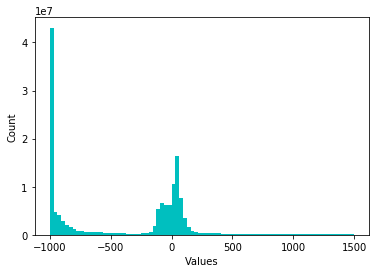

In [5]:
# # Show histogram of Hounsfield density bins
ct_utils.plot_volume_histogram(first_sample_pixels, bins=80, range=(-1000, 1500) ,color='c')

# # Show some slice in the middle
# plt.imshow(first_sample_pixels[80], cmap=plt.cm.gray)
# plt.show()

In [6]:
# Resample volume
spacing = ct_utils.get_dicom_spacing(first_sample)
pix_resampled, _ = ct_utils.resample(first_sample_pixels, spacing)
label_resampled, _ = ct_utils.resample(label, spacing)
print("Data before resampling\t", first_sample_pixels.shape)
print("Label before resampling\t", label.shape)
print("Data after resampling\t", pix_resampled.shape)
print("Label after resampling\t", label_resampled.shape)

Data before resampling	 (718, 512, 512)
Label before resampling	 (718, 512, 512)
Data after resampling	 (359, 278, 278)
Label after resampling	 (359, 278, 278)


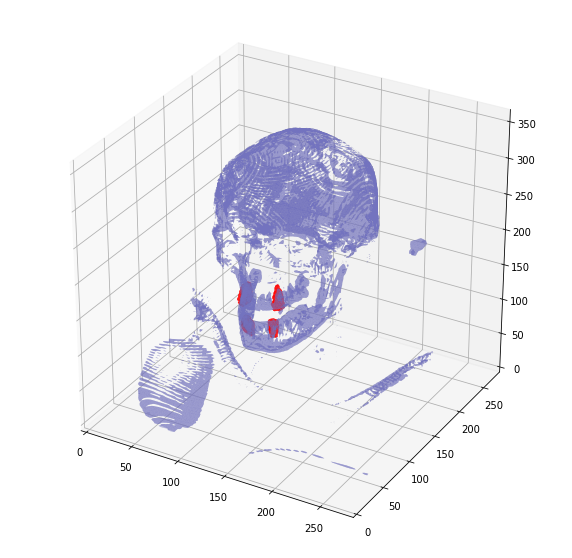

In [7]:
# ct_utils.plot_3d(pix_resampled, 1200, [2, 1, 0], 2)
# ct_utils.plot_3d(label_resampled, 0, [2, 1, 0])
ct_utils.plot_3d_with_labels(pix_resampled, label_resampled, 1200, [2, 1, 0], 2)

In [8]:
# vv = visualize_volumes.ImageSliceViewer3D(pix_resampled)
# ct_utils.make_gifs(pix_resampled, "test_gif", "axial")

![SegmentLocal](test_gif_axial.gif "segment")

In [9]:
min_box, max_box = ct_utils.jaw_isolation(pix_resampled, iterations=4, growth_rate=.98, size=[75, 75, 75])
jaw_isolated = ct_utils.extract_roi(pix_resampled, min_box, max_box)
label_isolated = ct_utils.extract_roi(label_resampled, min_box, max_box)
print(jaw_isolated.shape)

(75, 75, 75)


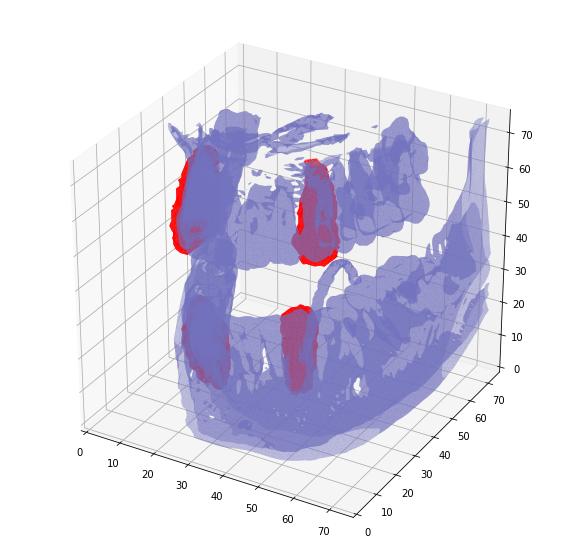

In [10]:
ct_utils.plot_3d_with_labels(jaw_isolated, label_isolated, 1000, [2, 1, 0], 1)

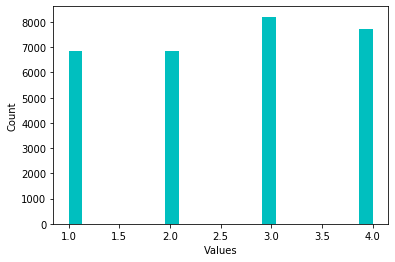

In [11]:
ct_utils.plot_volume_histogram(label, bins=22, range=[1, 4] ,color='c')

In [12]:
# Normalize the image between selected HU units

MIN_BOUND = 1000.0
MAX_BOUND = 2000.0

def normalize(image):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

In [13]:
PIXEL_MEAN = 0.25

def zero_center(image):
    image = image - PIXEL_MEAN
    return image